In [1]:
#PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim

#Other libraries
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("..")

#Custom python files
from model.model import LSTM_baseline
from training import *
from util.dataloader import *

In [26]:
input_dim = 8
hidden_dim = 50
batch_size = 20
num_epochs = 40
total_num_games = 7000

lstm = TrainingAndEvaluation(input_dim, hidden_dim, num_epochs=num_epochs, model='LSTM_baseline', collate_fn=PadSequence,
                                     batch_size=batch_size, total_num_games=total_num_games, device=torch.device('cuda'),
                                      feature_folder='../data/mixed/features_agg//', label_folder='../data/mixed/labels/')

GPU is used.


In [27]:
results = lstm.train()

Epoch 10 finished. Train loss: 0.170837. Validation loss: 0.171481
Epoch 20 finished. Train loss: 0.163294. Validation loss: 0.160121
Epoch 30 finished. Train loss: 0.163979. Validation loss: 0.168572
Epoch 40 finished. Train loss: 0.158154. Validation loss: 0.150909


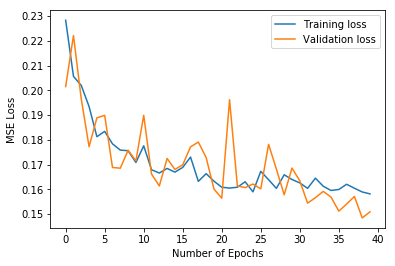

In [28]:
plt.figure(0)
plt.plot(results['train_loss'], label='Training loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [31]:
torch.save(lstm.model.model, '../saved_model/model_agg.pt')

In [32]:
lstm.model.model = torch.load('../saved_model/model_agg.pt')

In [29]:
threshold = 0.1
percentage = 0.05
acc = lstm.get_accuracy(threshold=threshold, percentage=percentage)

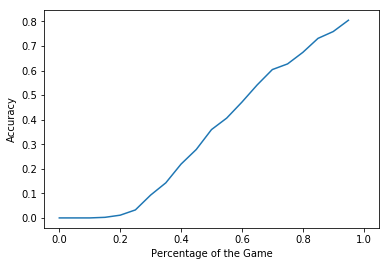

In [30]:
per = np.arange(0,1.0,percentage)
plt.figure(0)
plt.plot(per, acc/20.0)
plt.xlim(-0.05,1.05)
plt.xlabel('Percentage of the Game')
plt.ylabel('Accuracy')
plt.show()

In [24]:
sample_graph = lstm.get_single_game_prediction(0)

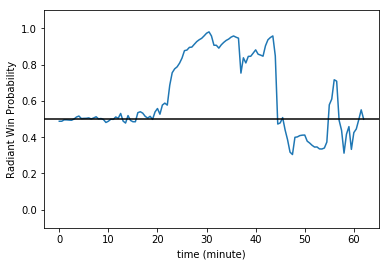

In [25]:
time_stamp = 0.5*np.arange(len(sample_graph.cpu().numpy().squeeze()))

plt.figure(1)
plt.plot(time_stamp, sample_graph.cpu().numpy().squeeze())
plt.axhline(0.5, color='k', linestyle='-')
plt.ylim(-0.1,1.1)
plt.xlabel('time (minute)')
plt.ylabel('Radiant Win Probability')
plt.show()